In [1]:
library(tidyverse)
library(dplyr)


Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

In [37]:
color_dict = c(
    "CellFlow-0"= "#E590C6",
    "CellFlow-1"= "#B12F8C",
    "Identity"="#E1C8AC")

In [38]:
output_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/pbmc_new_cytokine/benchmark/IL-15"

In [39]:
df <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/results/allocation/metrics_sub.csv")

New names:
• `` -> `...1`
Rows: 3 Columns: 180
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (11): ...1, Unnamed: 0, predicted_deg_genes, wandb_name, donors_in_trai...
dbl (168): mean_decoded_r_sq_per_cell_type, mean_e_distance_per_cell_type, m...
lgl   (1): split-idx

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [40]:
df$method2 <- factor(df$method2, 
                                levels = c("id", "cf0", "cf1"),
                                labels = c("Identity", "CellFlow-0","CellFlow-1"))  # Correct factorization


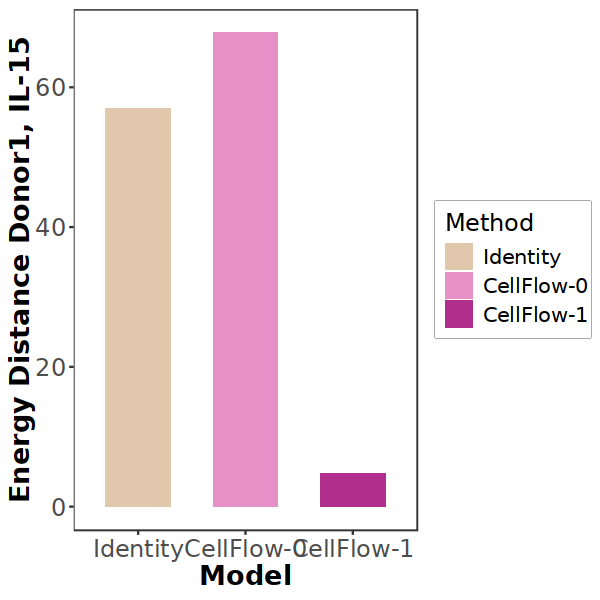

In [41]:
options(repr.plot.width = 5, repr.plot.height = 5)


p <- ggplot(df, aes(x=method2, y=ood_e_distance, fill=method2)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  labs(
    x="Model",
    y="Energy Distance Donor1, IL-15",
    fill="Method"
  ) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p


In [42]:
ggsave(file.path(output_dir, "e_distance.pdf"), plot = p, device = "pdf",width = 5, height = 5)

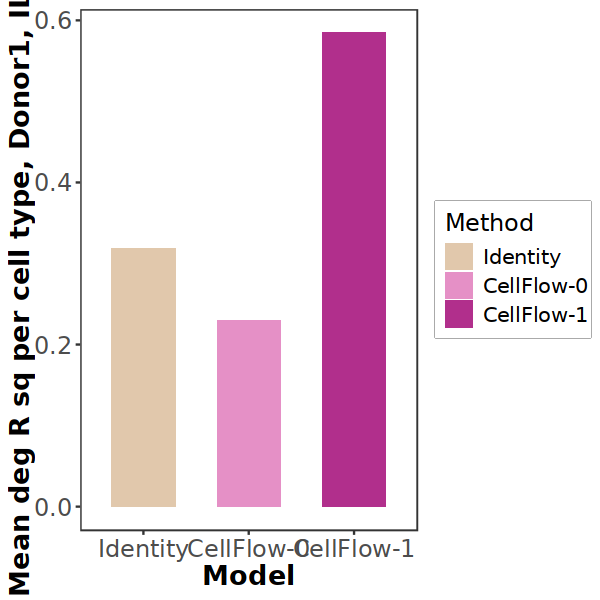

In [43]:
options(repr.plot.width = 5, repr.plot.height = 5)


p <- ggplot(df, aes(x=method2, y=mean_deg_r_sq_per_cell_type, fill=method2)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  labs(
    x="Model",
    y="Mean deg R sq per cell type, Donor1, IL-15",
    fill="Method"
  ) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p


In [44]:
ggsave(file.path(output_dir, "mean_deg_r_sq_per_cell_type.pdf"), plot = p, device = "pdf",width = 5, height = 5)

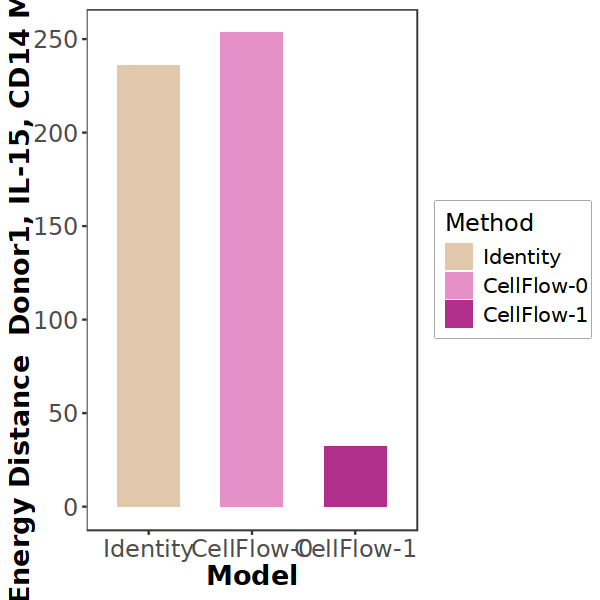

In [45]:
options(repr.plot.width = 5, repr.plot.height = 5)


p <- ggplot(df, aes(x=method2, y=e_distance_CD14_Mono, fill=method2)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  labs(
    x="Model",
    y="Energy Distance  Donor1, IL-15, CD14 Mono",
    fill="Method"
  ) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p


In [46]:
ggsave(file.path(output_dir, "E_distance_cd14_mono.pdf"), plot = p, device = "pdf",width = 5, height = 5)

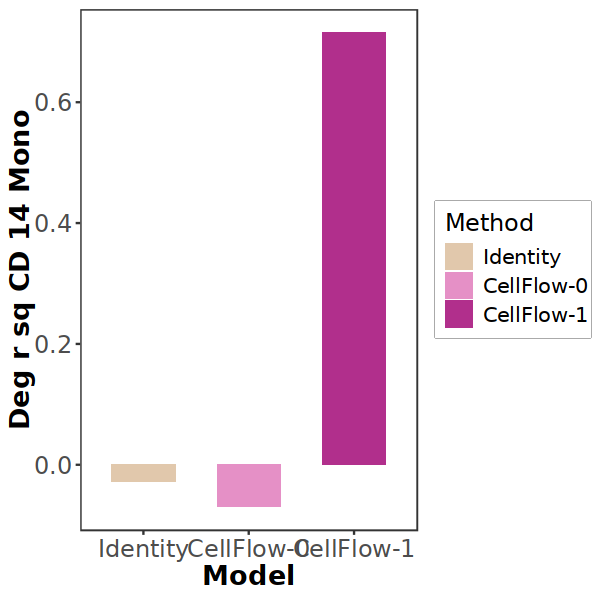

In [47]:
options(repr.plot.width = 5, repr.plot.height = 5)


p <- ggplot(df, aes(x=method2, y=deg_decoded_r_squared_CD14_Mono, fill=method2)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  labs(
    x="Model",
    y="Deg r sq CD 14 Mono",
    fill="Method"
  ) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p


In [48]:
ggsave(file.path(output_dir, "Deg_r_sq_cd14_mono.pdf"), plot = p, device = "pdf",width = 5, height = 5)